In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Read the CSV file
df = pd.read_csv('merged_features.csv')
df.head()

,file_name,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,10006_462822612.png,2,10006,462822612,L,CC,61.0,0,0,0,...,2.006679,0.894181,0.883844,0.975226,27.375065,0.036530,3660.500000,0.993003,0.000273,1612
1,10006_1459541791.png,2,10006,1459541791,L,MLO,61.0,0,0,0,...,2.785983,0.825138,0.807728,0.984704,3.095282,0.323072,6146.500000,0.918269,0.000163,2207
2,10006_1864590858.png,2,10006,1864590858,R,MLO,61.0,0,0,0,...,2.556648,0.837710,0.821774,0.984543,29.268959,0.034166,3791.666667,0.961966,0.000264,1836
3,10006_1874946579.png,2,10006,1874946579,R,CC,61.0,0,0,0,...,1.844593,0.905841,0.897936,0.974905,27.294815,0.036637,3203.000000,0.993263,0.000312,1574
4,10011_220375232.png,2,10011,220375232,L,CC,55.0,0,0,0,...,3.131832,0.757028,0.729378,0.979597,NaN,NaN,4281.250000,0.788308,0.000234,3630


**Observation:-** We can see that there are some missing values in the BIRADS and density column. We will explore more about this later to check if this can have any effect on the performance of the model.

### **About the data**

**site_id**- ID code for the source hospital.

**patient_id** - ID code for the patient.

**image_id** - ID code for the image.

**laterality** - Whether the image is of the left or right breast.

**view** - The orientation of the image. The default for a screening exam is to capture two views per breast.

**age** - The patient's age in years.

**implant** - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.

**density** - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.

**machine_id** - An ID code for the imaging device.

**cancer** - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.

**biopsy** - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.

**invasive** - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.

**BIRADS** - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.

**prediction_id** - The ID for the matching submission row. Multiple images will share the same prediction ID. Test only.

**difficult_negative_case** - True if the case was unusually difficult. Only provided for train.

**color_intensity_r**: Mean red color intensity in the image.

**color_intensity_g**: Mean green color intensity in the image.

**color_intensity_b**: Mean blue color intensity in the image.

**mean_pixel_value**: Mean pixel value in the image.

**std_pixel_value**: Standard deviation of pixel values in the image.

**variance**: Variance of pixel values in the image.

**skewness**: Skewness of the image intensity distribution.

**contrast**: Contrast of the image, a measure of the local intensity differences.

**dissimilarity**: Dissimilarity of the image, a measure of the local texture differences.

**homogeneity**: Homogeneity of the image, a measure of the local similarity of pixels.

**energy**: Energy of the image, a measure of the sum of squared pixel values.

**correlation**: Correlation of the image, a measure of the linear relationship between pixel values.

**compactness**: Compactness of the image, a measure of the shape complexity.

**circularity**: Circularity of the image, a measure of how closely the shape resembles a circle.

**mean_microcalcification_size**: Mean size of microcalcifications in the image.

**mean_microcalcification_solidity**: Mean solidity of microcalcifications in the image.

**microcalcification_clustering**: Measure of the clustering of*microcalcifications in the image.

**edge_count**: Number of edges in the image, as detected by an edge-detection algorithm.

In [ ]:
df.shape

(54706, 33)

In [ ]:
# Check data types of each column
print(df.dtypes)

file_name                            object
site_id                               int64
patient_id                            int64
image_id                              int64
laterality                           object
view                                 object
age                                 float64
cancer                                int64
biopsy                                int64
invasive                              int64
BIRADS                              float64
implant                               int64
density                              object
machine_id                            int64
difficult_negative_case                bool
color_intensity_r                   float64
color_intensity_g                   float64
color_intensity_b                   float64
mean_pixel_value                    float64
std_pixel_value                     float64
variance                            float64
skewness                            float64
contrast                        

**Observation:-**The data types of the features include integers (int64), floats (float64), categorical variables (object), and a boolean variable (bool).

In [ ]:
# Function to determine the type of a column
def identify_type(column):
    if column.dtype in ['float64', 'int64']:
        if len(column.unique()) < 10:
            return 'numerical_categorical'
        else:
            return 'continuous'
    elif column.dtype == 'object':
        return 'textual_categorical'
    else:
        return 'boolean'
# Print the type of each column
for col_name, col_data in df.iteritems():
    print(f"{col_name}: {identify_type(col_data)}")

file_name: textual_categorical
site_id: numerical_categorical
patient_id: continuous
image_id: continuous
laterality: textual_categorical
view: textual_categorical
age: continuous
cancer: numerical_categorical
biopsy: numerical_categorical
invasive: numerical_categorical
BIRADS: numerical_categorical
implant: numerical_categorical
density: textual_categorical
machine_id: continuous
difficult_negative_case: boolean
color_intensity_r: continuous
color_intensity_g: continuous
color_intensity_b: continuous
mean_pixel_value: continuous
std_pixel_value: continuous
variance: continuous
skewness: continuous
contrast: continuous
dissimilarity: continuous
homogeneity: continuous
energy: continuous
correlation: continuous
compactness: continuous
circularity: continuous
mean_microcalcification_size: continuous
mean_microcalcification_solidity: continuous
microcalcification_clustering: continuous
edge_count: continuous


<ipython-input-5-8cc3d3a0bf06>:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in df.iteritems():


**EDA**

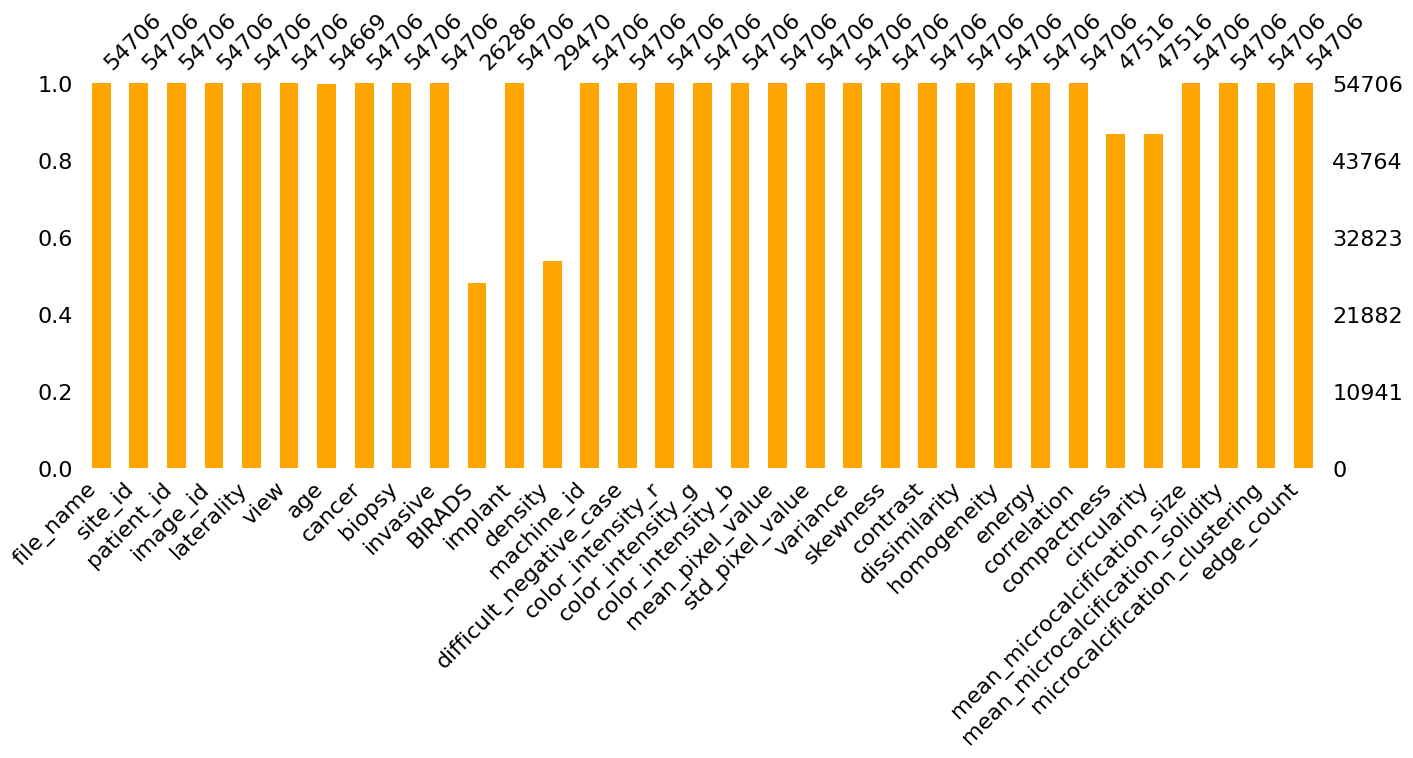

In [ ]:
import missingno as msno
msno.bar(df, figsize = (16,5),color = "orange")
plt.show()

**Observation:-** There are some missing values in BIRADS, density, compactness and circularity category. We will handle that later

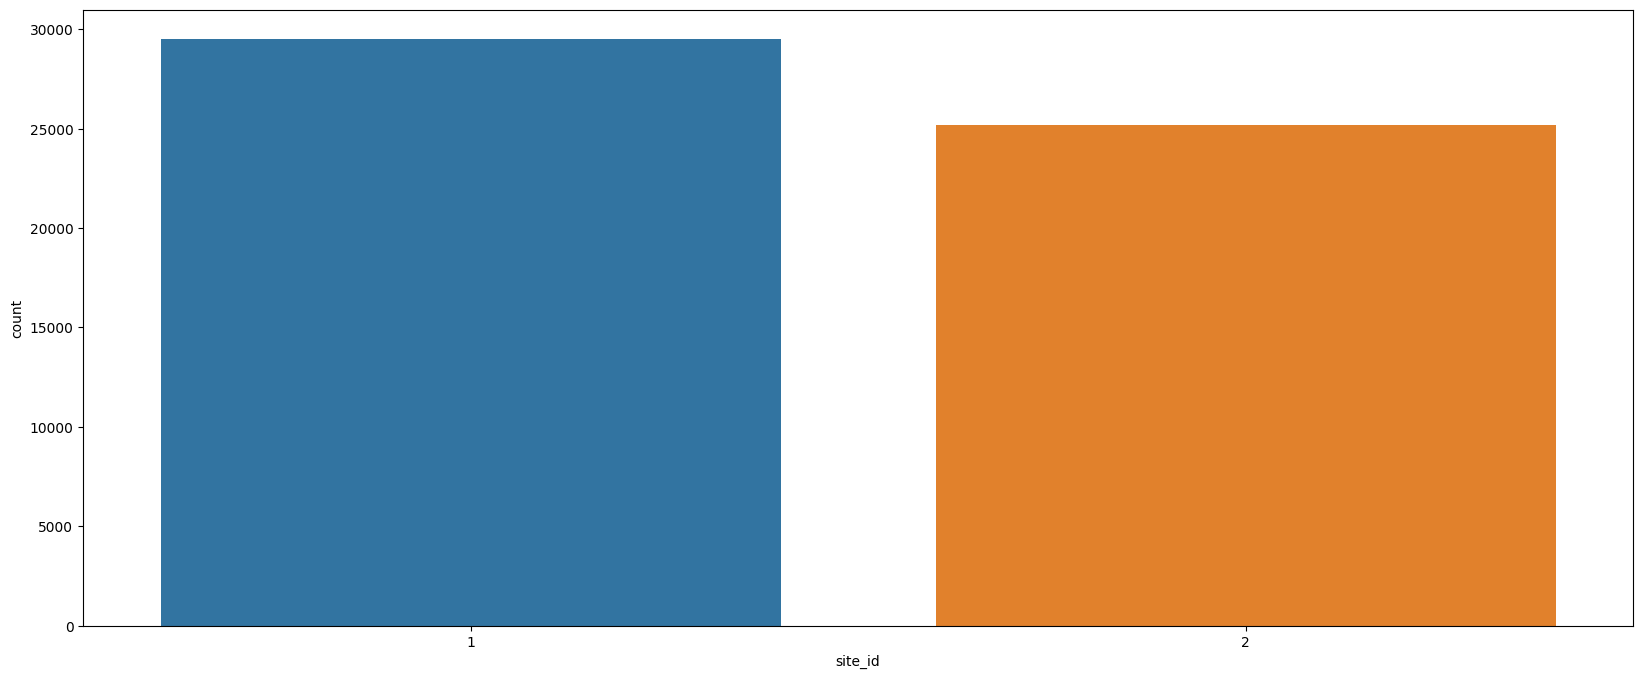

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(x='site_id', data=df)
plt.show()

**Observation:-** First, we was checked the total sites registered on the table. We found that there are only two of them and the images are almost equally distributed. Then, the plot helps to identify that there is a difference of almost 5000 images between places.

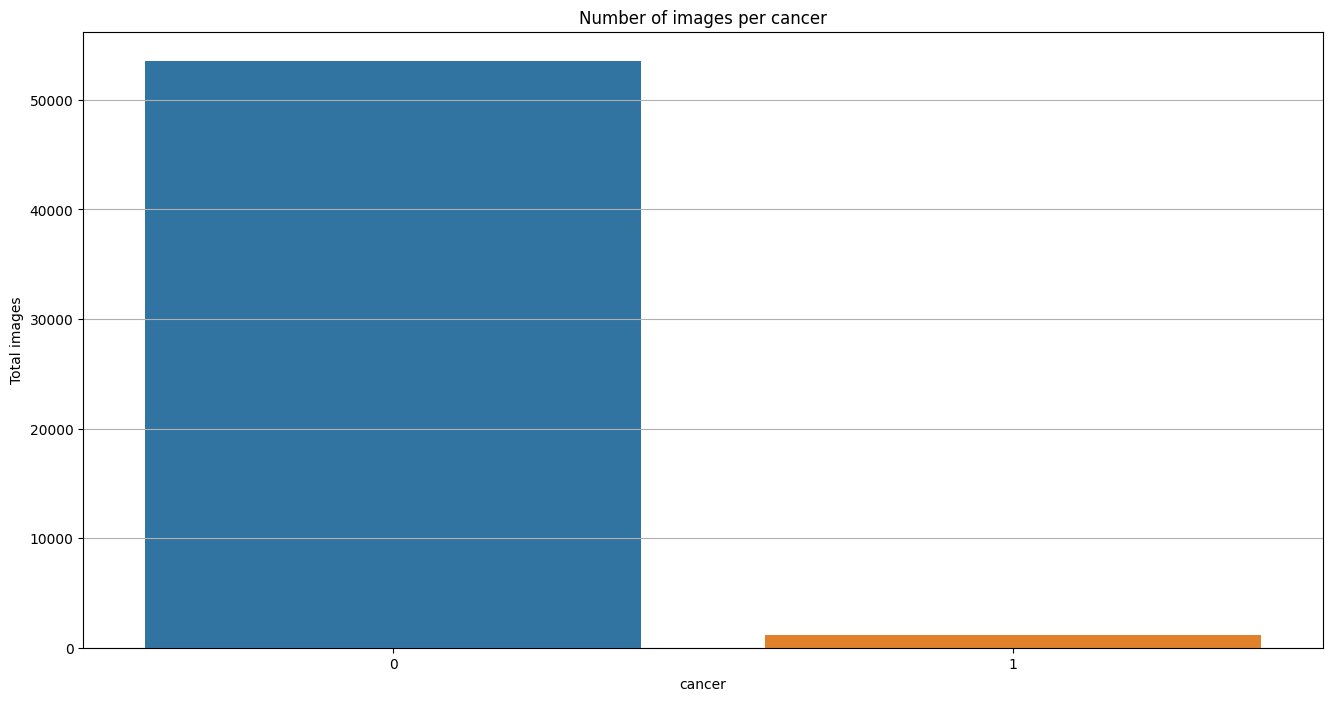

In [ ]:
count_cancer=df.groupby(by="cancer").count()["patient_id"]
count_cancer.reset_index().head()
plt.figure(figsize=(16,8))
plt.grid()
plt.title("Number of images per cancer")
sns.barplot(data=count_cancer.reset_index(),x="cancer",y="patient_id")
plt.ylabel("Total images");

**Observation:-** It was seen that most of the images correspond to Mammographies of non-cancer patients. This could be a challenge for the overall prediction as the percentage of cancer images is low.

In [ ]:
count_biopsy=df.groupby(by="biopsy").count()["patient_id"]
count_biopsy.reset_index().head()

,biopsy,patient_id
0,0,51737
1,1,2969


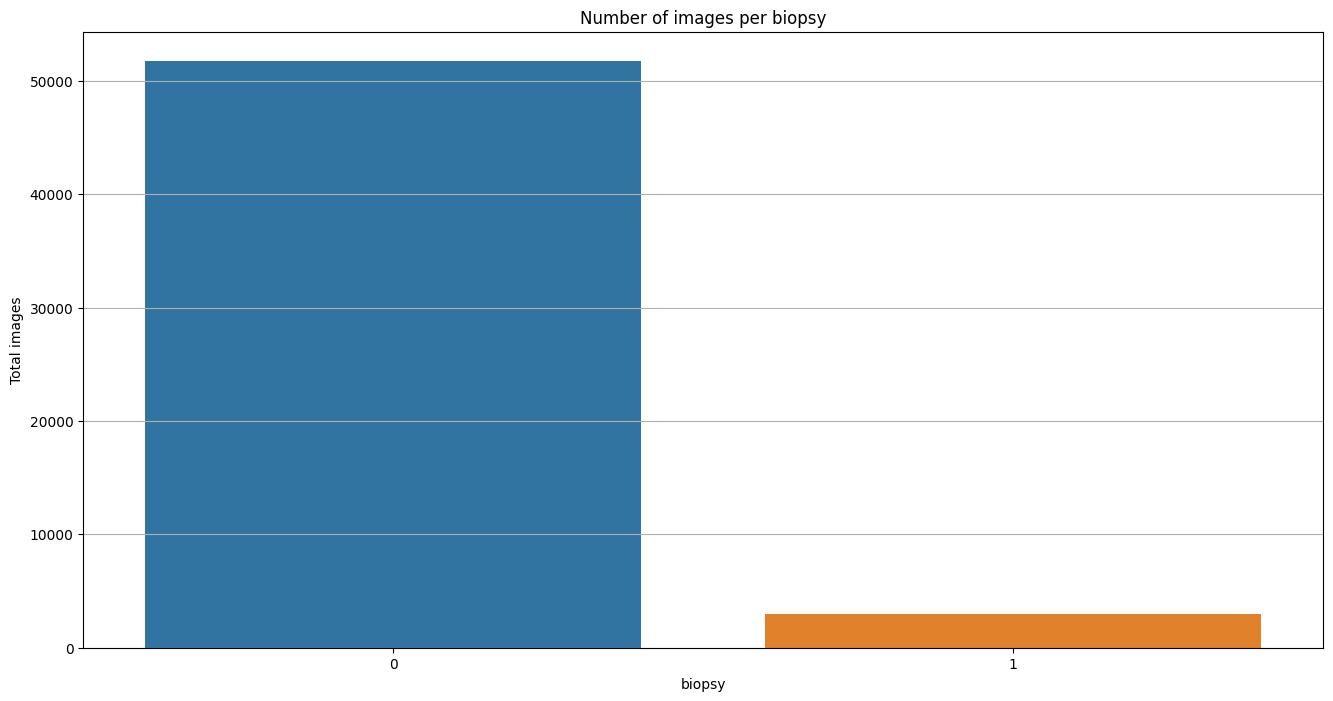

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.title("Number of images per biopsy")
sns.barplot(data=count_biopsy.reset_index(),x="biopsy",y="patient_id")
plt.ylabel("Total images");

**Observation:-** Biopsy also showed a similar trend where all the patients who underwent biopsy did not necessarily have cancer.

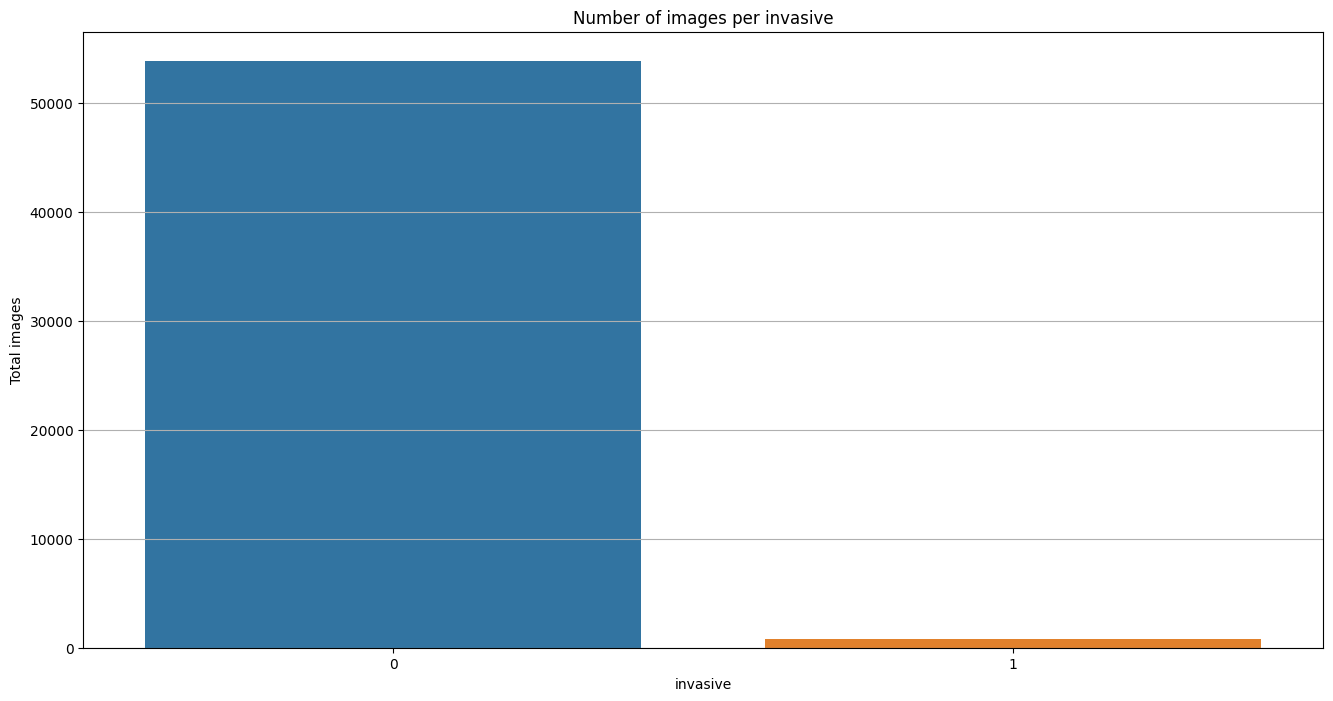

In [ ]:
count_invasive=df.groupby(by="invasive").count()["patient_id"]
count_invasive.reset_index().head()
plt.figure(figsize=(16,8))
plt.grid()
plt.title("Number of images per invasive")
sns.barplot(data=count_invasive.reset_index(),x="invasive",y="patient_id")
plt.ylabel("Total images");

**Observation:-** It can be observed that not all the cancer images represent an invasive/harmful disease.

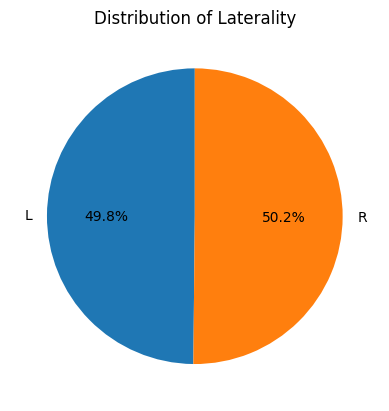

In [ ]:
count_lateral=df.groupby(by="laterality").count()["patient_id"]
count_lateral.plot.pie(labels=count_lateral.index, autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Distribution of Laterality')
plt.show()

**Observation:-** The number of images for each laterality is almost equal for all the patients. This shows that screening Mammography is done on both breasts. This is a positive sign as it reduces the potential for biases or underrepresentation of either side. It also means that any differences or asymmetries in the prevalence or severity of breast cancer between the left and right sides can be more accurately assessed and analyzed.

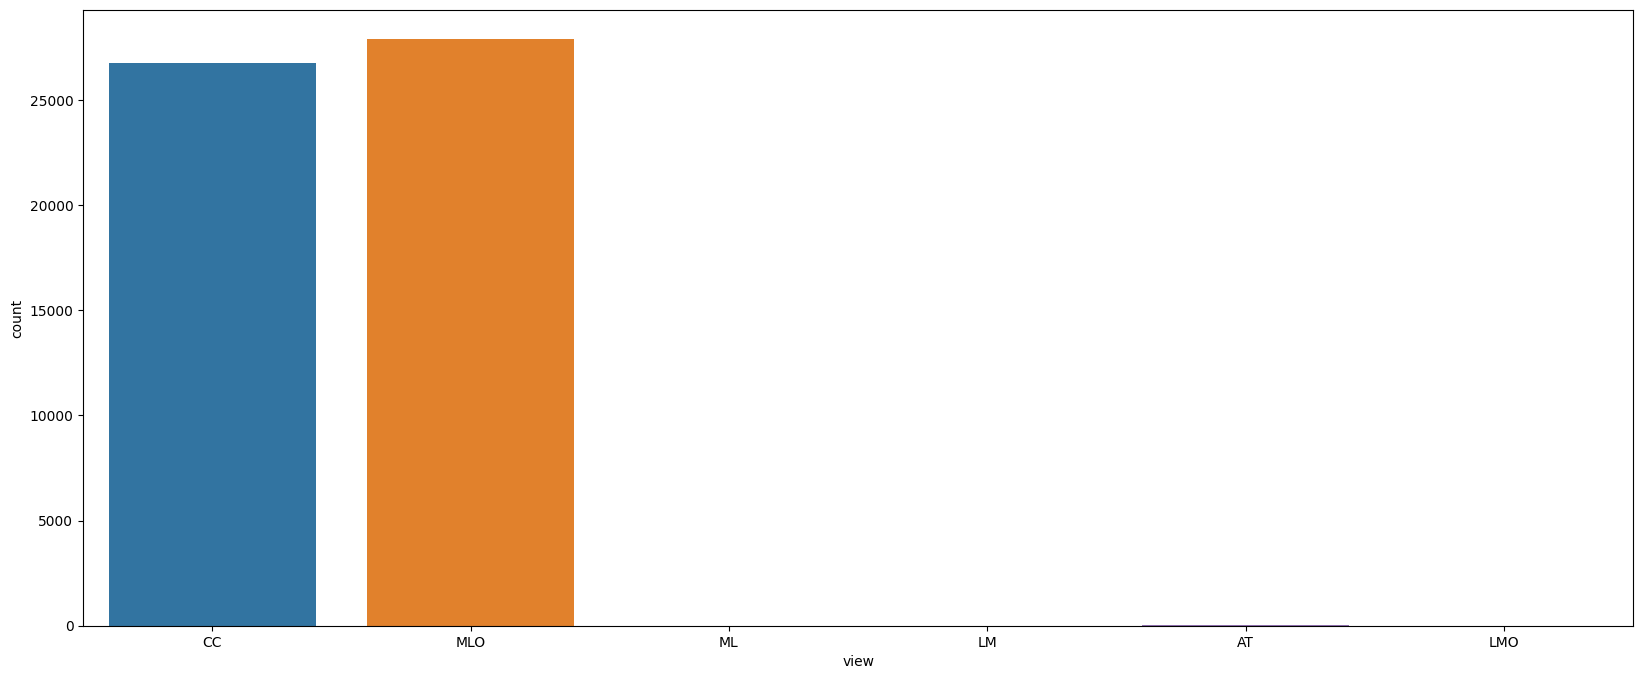

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(x='view', data=df)
plt.show()

**Observation:-** Majority of data is taken in CC (cranial-caudal) or MLO (mediolateral oblique) view. ***This suggests that these two views are commonly used in breast imaging and are likely important for accurate diagnosis and assessment of breast health.*** The extremely low count of images taken in the AT (axial) view suggests that this view may not be commonly used in breast imaging or may not be as useful for assessing breast health as the CC and MLO views.

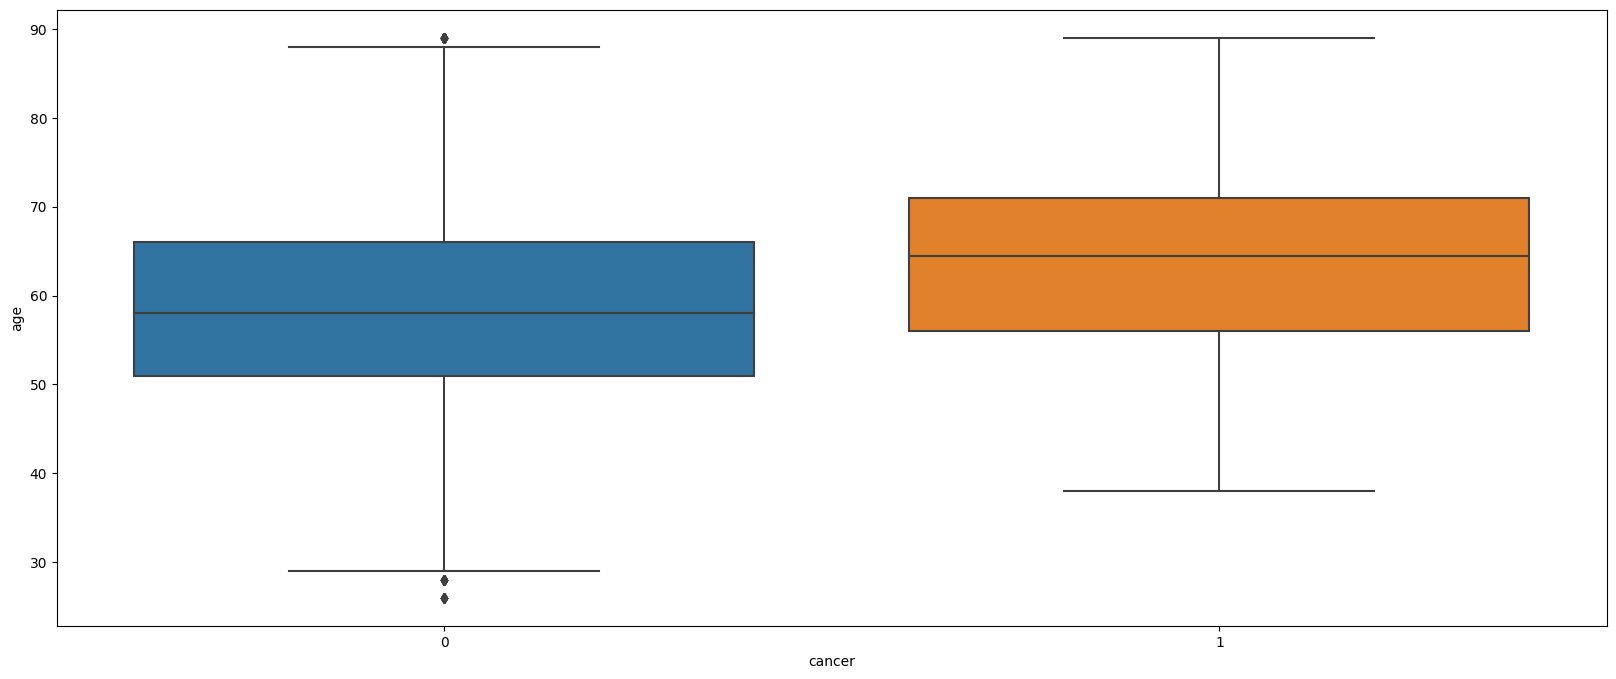

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(x='cancer', y='age', data=df)
plt.show()

**Observation:-** We notice few outliers specifically the patients that are below the age of 30 and near 90 years of age.

If we think intuitively age can affect our immune system and increase the chances of cancer so let's try to explore any relationship between age and cancer. 

In [ ]:
ages = df.groupby('patient_id')['age'].apply(lambda x: x.unique()[0])
cancer_ages = df[df['cancer'] == 1].groupby('patient_id')['age'].apply(lambda x: x.unique()[0])
no_cancer_ages = df[df['cancer'] == 0].groupby('patient_id')['age'].apply(lambda x: x.unique()[0])

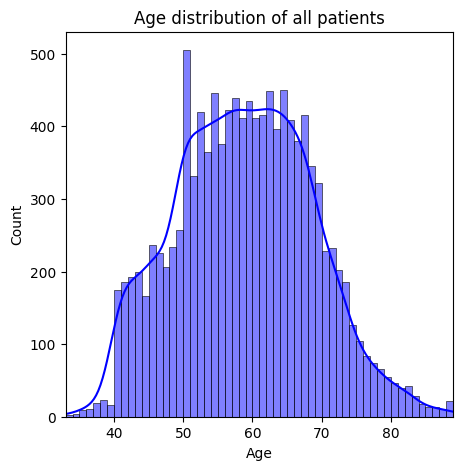

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(ages, bins=63, color='blue', kde=True)
plt.title("Age distribution of all patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(33, 89)
plt.show()

**Observation:-** We notice a normal distribution. A normal distribution of age for all patients suggests that the ages of the patients in the dataset are evenly distributed around a central value, with relatively few patients at the extremes of the age range.

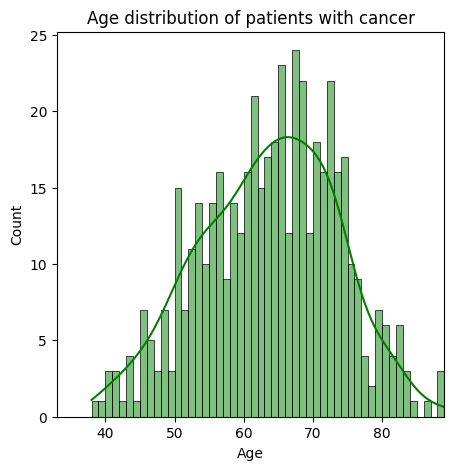

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(cancer_ages, bins=51, color='green', kde=True)
plt.title("Age distribution of patients with cancer")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(33, 89)
plt.show()

**Observation**:- We can observe that the age of patients with cancer is ***negatively skewed***. This means that most of the patients who had cancer were near the age of 60.

In [ ]:
print("Mean age (cancer) is:", cancer_ages.mean())
print("Mode of age (cancer) is:",cancer_ages.mode())
print("Mean age (non-cancer) is:", no_cancer_ages.mean())
print("Mode of age (non-cancer) is:",no_cancer_ages.mode())

Mean age (cancer) is: 63.49382716049383
Mode of age (cancer) is: 0    67.0
Name: age, dtype: float64
Mean age (non-cancer) is: 58.63854105387007
Mode of age (non-cancer) is: 0    50.0
Name: age, dtype: float64


The mean and mode age of patients with cancer and without cancer in the dataset can provide insights into the typical age range of patients with and without cancer.

The mean age of patients with cancer is 63.49 years, while the mean age of patients without cancer is 58.64 years. This suggests that patients with cancer tend to be older than those without cancer.

The mode age of patients with cancer is 67 years, while the mode age of patients without cancer is 50 years. The mode represents the most common value in the dataset, so this indicates that the most common age for patients with cancer is 67 years, while the most common age for patients without cancer is 50 years.

These findings are in line with what is known about breast cancer incidence, which increases with age, with the majority of cases diagnosed in women over 50 years old. Therefore, it is important to take age into account when analyzing breast cancer data and developing machine learning models to ensure that the models accurately reflect the age distribution of the real-world population.

**So we can conclude that age is an important factor for cancer.**

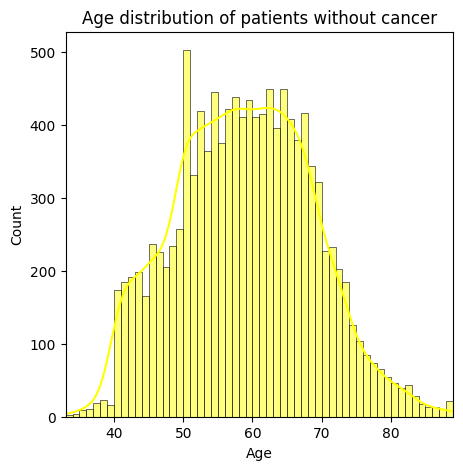

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(no_cancer_ages, bins=63, color='yellow', kde=True)
plt.title("Age distribution of patients without cancer")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(33, 89)
plt.show()

So we can say that age can have a impact on cancer, we now try to check if patients who had implants were also at high risk of cancer or not.

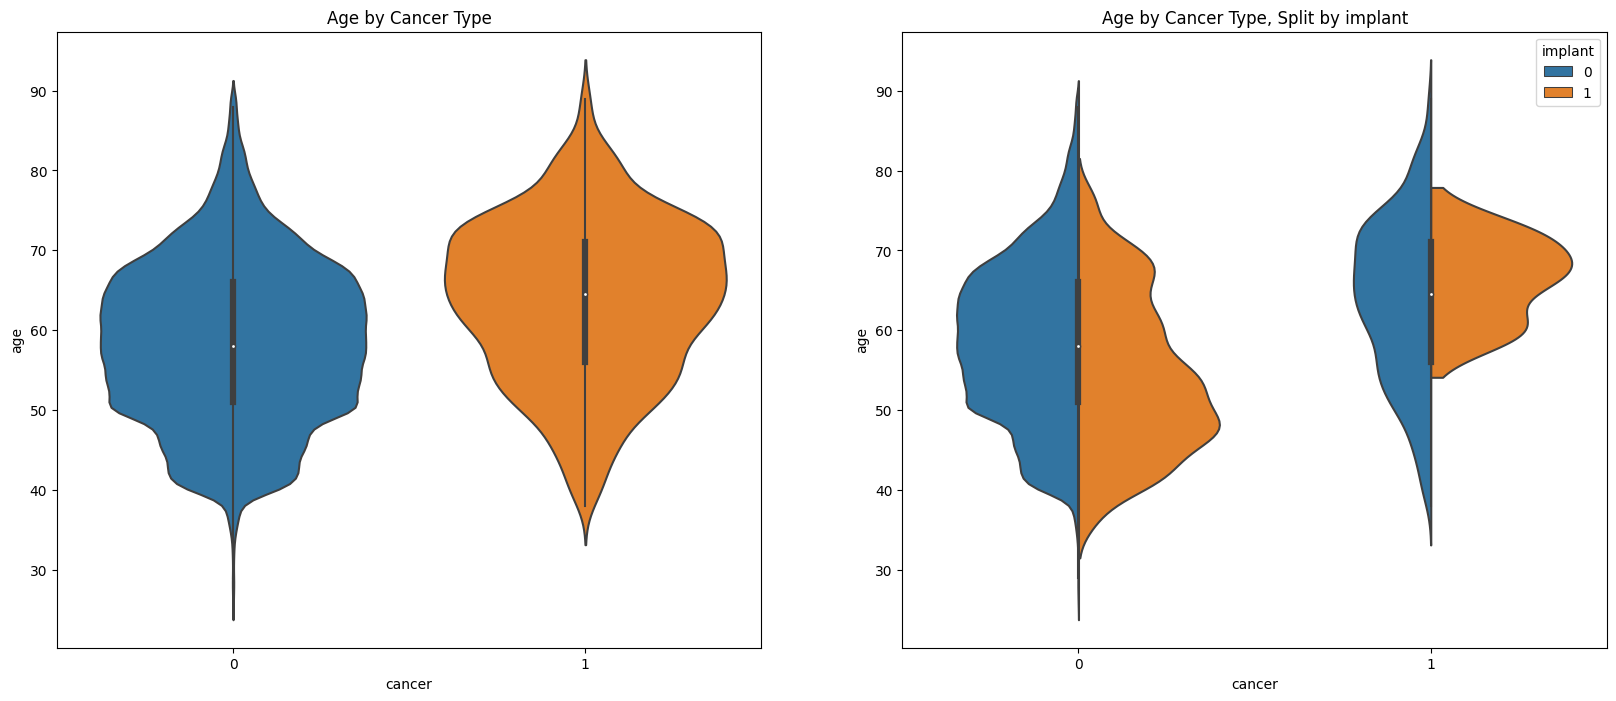

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.violinplot(x='cancer', y='age', data=df, ax=axes[0])
axes[0].set_title('Age by Cancer Type')

# Violin plot for age by cancer, split by implant
sns.violinplot(x='cancer', y='age', hue='implant', data=df, ax=axes[1], split=True)
axes[1].set_title('Age by Cancer Type, Split by implant')

plt.show()

**Observation:-** 

1. In the violin plot for age by cancer type, we can conlude that most of the females who had cancer were distributed around the age of 70.

2. In the violin plot for age by cancer type ; split by implant, we can conclude that the patients who had implants might be more prone to cancer as the width of the violen plot for patients with cancer and implants had higher density of observations.
Most of these patients were also around the age of 65.

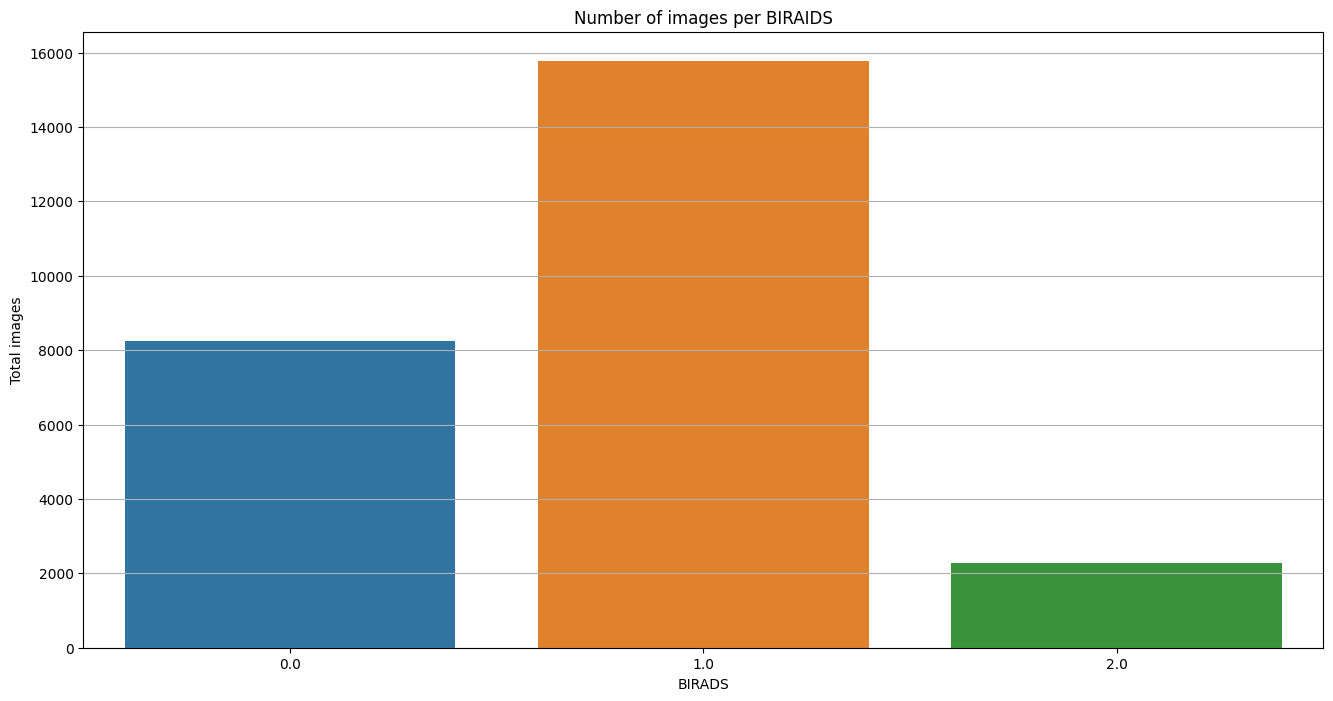

In [ ]:
count_birads=df.groupby(by="BIRADS").count()["patient_id"]
count_birads.reset_index().head()
plt.figure(figsize=(16,8))
plt.grid()
plt.title("Number of images per BIRAIDS")
sns.barplot(data=count_birads.reset_index(),x="BIRADS",y="patient_id")
plt.ylabel("Total images");

**Observation:-** We can observe that the majority of the individuals in the dataset (60%) have a BIRADS score of 1, which indicates a very low suspicion for malignancy. This suggests that the dataset may be skewed towards individuals with a low risk of breast cancer. Usually a BIRADS score of 4 is considered to be abnormal.

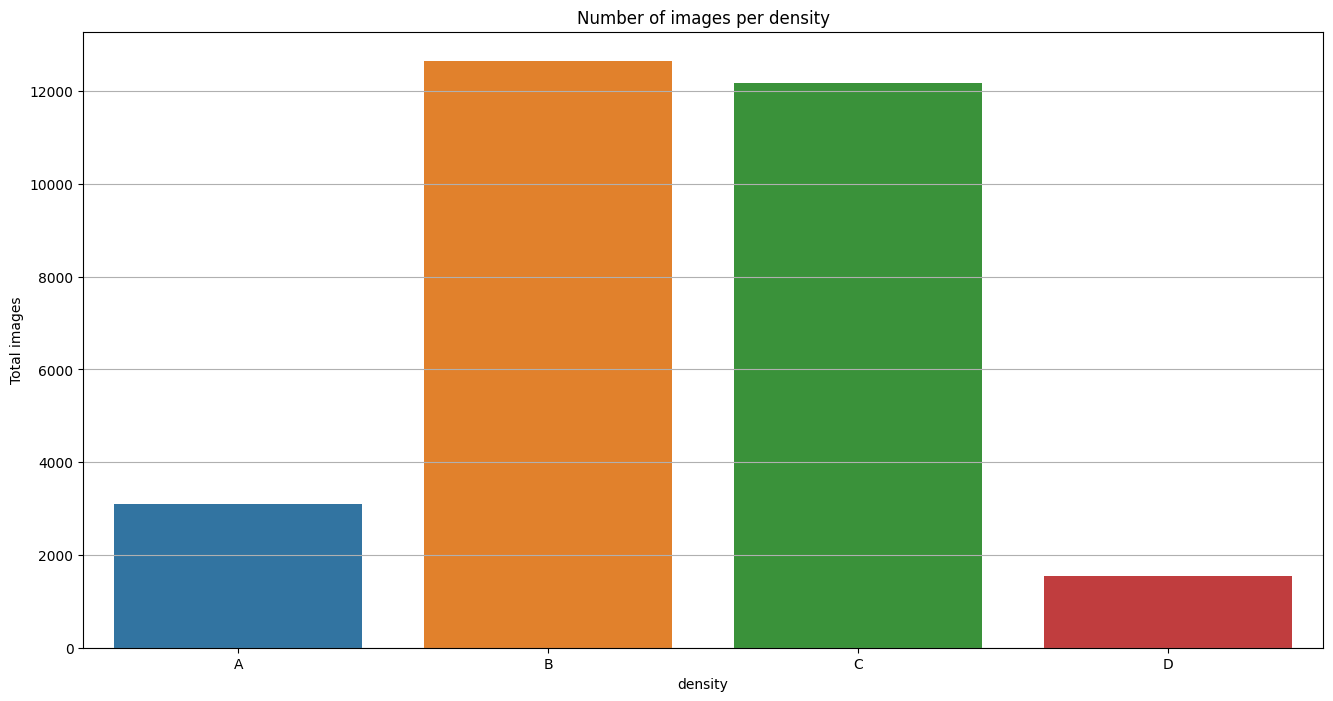

In [ ]:
count_density=df.groupby(by="density").count()["patient_id"]
plt.figure(figsize=(16,8))
plt.grid()
plt.title("Number of images per density")
sns.barplot(data=count_density.reset_index(),x="density",y="patient_id")
plt.ylabel("Total images");

**Observation:-** The density variable shows that most of the patients have a tissue density in the categories B and C while the number with D is the lowest.

<ipython-input-23-0370715f18a5>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(cancer_df['color_intensity_r'], cancer_df['cancer'], cmap='coolwarm')
<ipython-input-23-0370715f18a5>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(cancer_df['color_intensity_g'], cancer_df['cancer'], cmap='coolwarm')
<ipython-input-23-0370715f18a5>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[2].scatter(cancer_df['color_intensity_b'], cancer_df['cancer'], cmap='coolwarm')


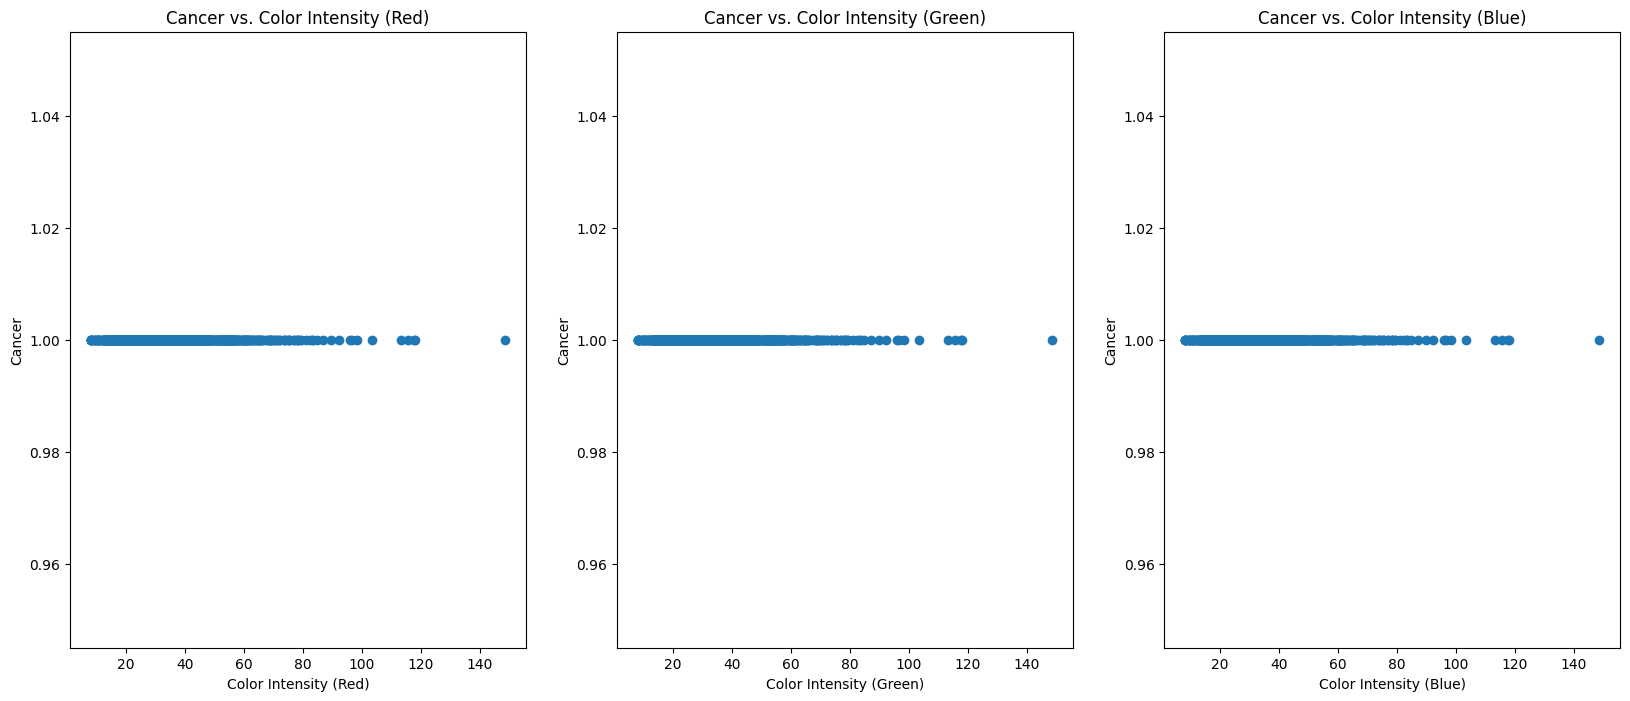

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
cancer_df = df[df['cancer'] == 1]

axes[0].scatter(cancer_df['color_intensity_r'], cancer_df['cancer'], cmap='coolwarm')
axes[0].set_xlabel('Color Intensity (Red)')
axes[0].set_ylabel('Cancer')
axes[0].set_title('Cancer vs. Color Intensity (Red)')

axes[1].scatter(cancer_df['color_intensity_g'], cancer_df['cancer'], cmap='coolwarm')
axes[1].set_xlabel('Color Intensity (Green)')
axes[1].set_ylabel('Cancer')
axes[1].set_title('Cancer vs. Color Intensity (Green)')

axes[2].scatter(cancer_df['color_intensity_b'], cancer_df['cancer'], cmap='coolwarm')
axes[2].set_xlabel('Color Intensity (Blue)')
axes[2].set_ylabel('Cancer')
axes[2].set_title('Cancer vs. Color Intensity (Blue)')

plt.show()


Initially, we did not realise that the mammograms images are black and white. During EDA, we realised that the color intensity for red, green, blue will be the same for black and white images so these fields have no role to play.

In [ ]:
cancer_contrast = df[df['cancer'] == 1].groupby('patient_id')['contrast'].mean()
print("Mean contrast for cancer patients", cancer_contrast.mean())
non_cancer_contrast = df[df['cancer'] == 0].groupby('patient_id')['contrast'].mean()
print("Mean contrast for non-cancer patients", non_cancer_contrast.mean())

# filter out NaN data for contrast and cancer columns
filtered_df = df[['contrast', 'cancer']].dropna()

# separate data for cancer and non-cancer patients
cancer_data = filtered_df[filtered_df['cancer'] == 1]['contrast']
non_cancer_data = filtered_df[filtered_df['cancer'] == 0]['contrast']

# perform t-test
t_stat, p_value = stats.ttest_ind(cancer_data, non_cancer_data, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_value)


Mean contrast for cancer patients 185.11989355497647
Mean contrast for non-cancer patients 162.88073415549715
t-statistic: 7.683347737356626
p-value: 3.196237552382825e-14


Null hypothesis - No significant difference in the mean contrast values between patients with and without cancer

Alternate hypothesis - Significant difference in the mean contrast values between patients with and without cancer

**Based on the t-statistic and p-value, we can reject the null hypothesis and conclude that there is a statistically significant difference in the mean contrast values between patients with and without cancer. Furthermore, since the t-statistic is positive, we can conclude that the average contrast values for patients with cancer is higher than for patients without cancer.**

In [ ]:
cancer_energy = df[df['cancer'] == 1].groupby('patient_id')['energy'].mean()
print("Mean energy for cancer patients", cancer_energy.mean());

non_cancer_energy = df[df['cancer'] == 0].groupby('patient_id')['energy'].mean()
print("Mean energy for non-cancer patients",non_cancer_energy.mean())

# filter out NaN data for energy/intensity and cancer columns
filtered_df = df[['energy', 'cancer']].dropna()

cancer_data = filtered_df[filtered_df['cancer'] == 1]['energy']
non_cancer_data = filtered_df[filtered_df['cancer'] == 0]['energy']

# perform t-test
t_stat, p_value = stats.ttest_ind(cancer_data, non_cancer_data, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_value)


Mean energy for cancer patients 0.6245554721976498
Mean energy for non-cancer patients 0.6241776168818292
t-statistic: 0.22193668943792427
p-value: 0.8244004497061043




The t-statistic of 0.2219 and p-value of 0.8244 suggest that there is no statistically significant difference in mean energy values between cancer and non-cancer patients. Therefore, we cannot conclude that there is a relationship between cancer and mean energy values.

In [ ]:
cancer_df = df[df['cancer'] == 1]
# get the compactness values for cancer patients
cancer_compactness = cancer_df['compactness']
print("Mean compactness for cancer patients:", cancer_compactness.mean())

cancer_df = df[df['cancer'] == 0]
# get the compactness values for cancer patients
cancer_compactness = cancer_df['compactness']
print("Mean compactness for non - cancer patients:", cancer_compactness.mean())


Mean compactness for cancer patients: 43.40574120610515
Mean compactness for non - cancer patients: 32.47957550676845


Compactness is a measure of how closely pixels are grouped together in an image, and breast tumors can be highly compact as they often appear as dense masses. Therefore, high compactness values may be indicative of the presence of a tumor in mammogram images.

In [ ]:
cancer_df = df[df['cancer'] == 1]
# get the circularity values for cancer patients
cancer_circularity = cancer_df['circularity']
print("Mean circularity for cancer patients:", cancer_circularity.mean())

non_cancer_df = df[df['cancer'] == 0]
# get the circularity values for cancer patients
non_cancer_circularity = non_cancer_df['circularity']
print("Mean circularity for non - cancer patients:", non_cancer_circularity.mean())


Mean circularity for cancer patients: 1.1849735411273787
Mean circularity for non - cancer patients: 1.2557135854872612


Circularity is a shape descriptor that quantifies how close an object's shape is to a perfect circle. In mammograms, circularity can be used to analyze the shape of masses or lesions detected in the breast tissue. A perfectly circular mass would have a circularity value of 1.0, while a value of 0.0 would represent an object with no circularity at all.

<ipython-input-28-0d131ec627c0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

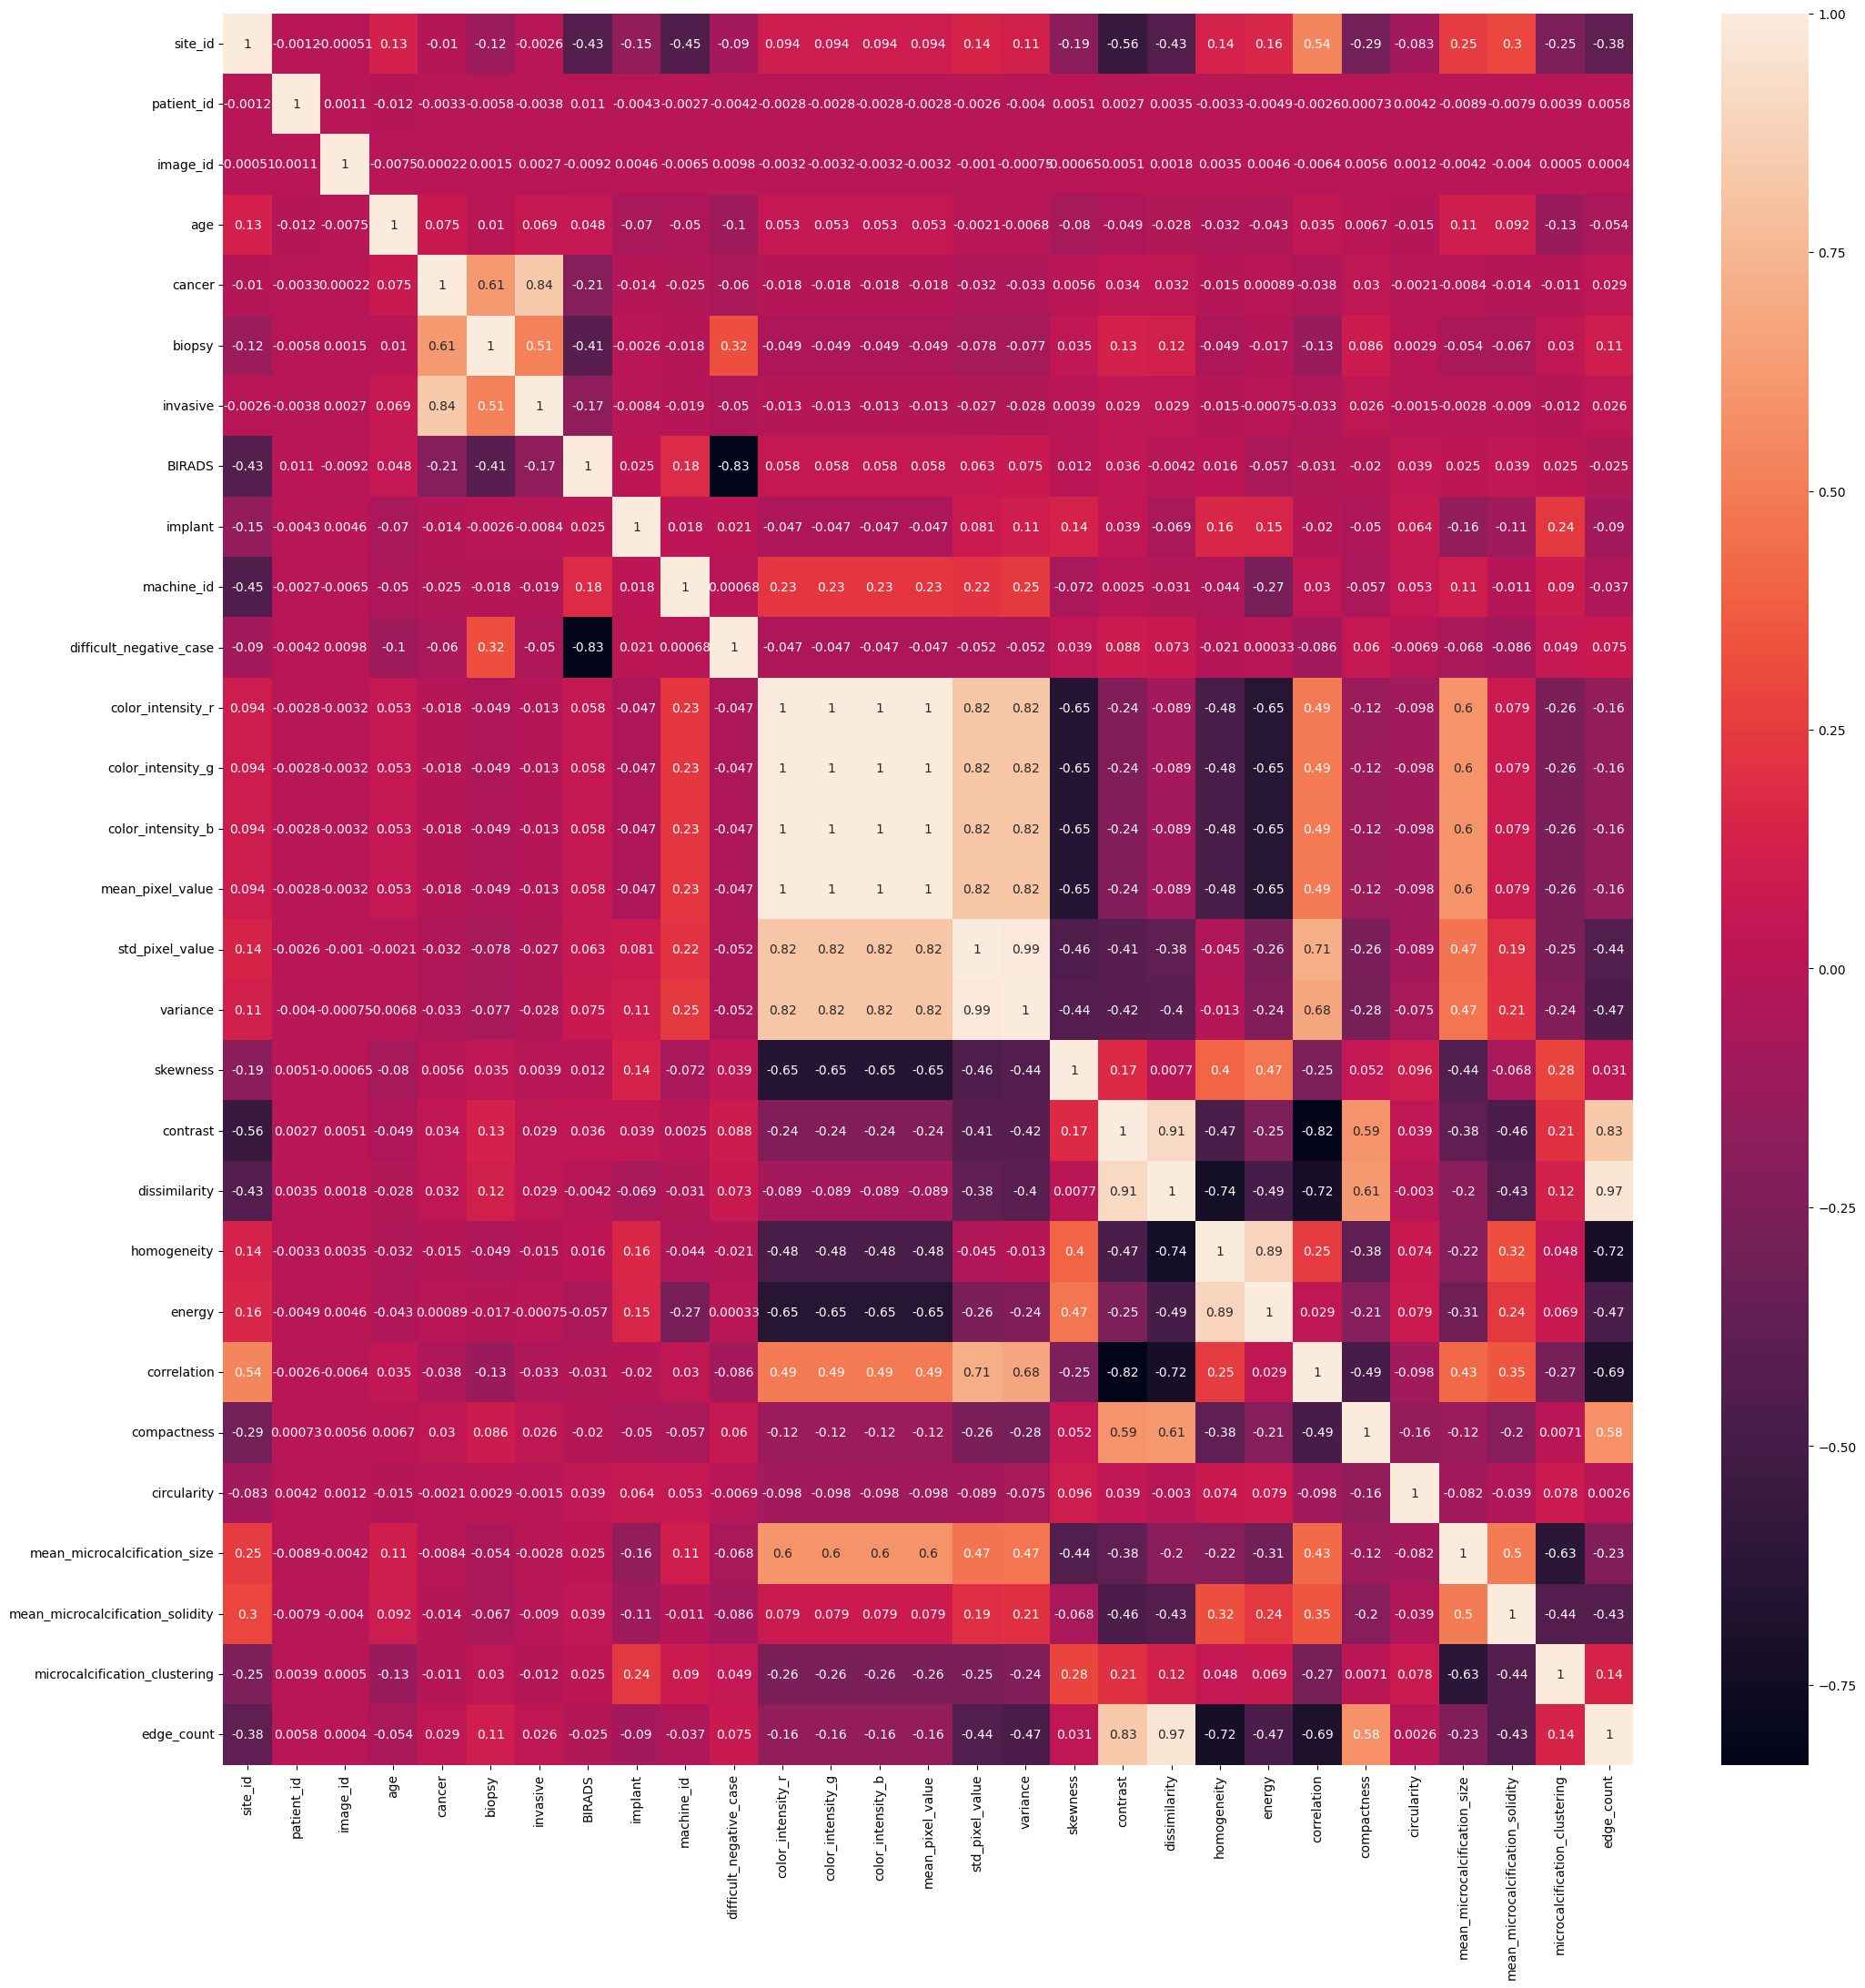

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(25, 25))

# Heatmap for correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

**Observation:-** We notice that there is a strong correlation between cancer, biopsy, and invasive variables.

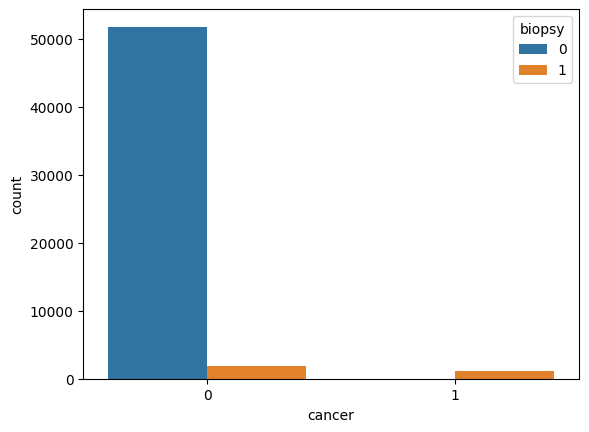

In [ ]:
sns.countplot(data=df, x="cancer", hue="biopsy");


**Observation:-** We can see that biopsy does have a strong correlation to cancer. If cancer is not present, biopsy has also shown the same output for most of the data. And when cancer is presnt, we can see that biopsy has also returned the same value.

### **Conclusion**

To conclude we found the following relations between variables 
1. There is a strong relationship between age and cancer. As people age, their risk of developing cancer increases. According to American cancer society breast cancer mainly occurs in middle-aged and older women. The median age at the time of breast cancer diagnosis is 62. This finding is consistent with our findings in this dataset. 

  This relationship between age and cancer can be explained by several factors. Firstly, as people age, their cells undergo more divisions, increasing the likelihood of errors in DNA replication that can lead to cancer. Additionally, older individuals may have been exposed to environmental factors that increase their risk of cancer over time, such as tobacco smoke, radiation, and certain chemicals.

  Furthermore, the body's ability to repair DNA damage and fight off cancer cells may decrease with age due to changes in the immune system and other physiological processes. As a result, older individuals may be more vulnerable to the development of cancer.

2. A biopsy is a medical procedure that involves the removal of a small sample of tissue or cells from the body for examination under a microscope. Biopsies are often used to diagnose cancer, as they can provide information about the presence of cancerous cells and their characteristics.

  The relationship between cancer and biopsy is therefore very important. A biopsy is typically recommended when cancer is suspected based on symptoms or imaging tests, such as X-rays, CT scans, or MRIs. By examining the biopsy sample, doctors can confirm the presence of cancer, determine its type and stage, and develop an appropriate treatment plan.

**References**

1. https://www.cancer.gov/about-cancer/causes-prevention/risk/age